In [4]:
from sklearn.linear_model import LinearRegression as lr
from sklearn.preprocessing import StandardScaler as ss
from sklearn import metrics
import pandas as pd
import json
from dbanalysis import stop_tools
routes = json.loads(open('/home/student/dbanalysis/dbanalysis/resources/trimmed_routes.json','r').read())
route = routes['75'][1]
models = []
scalers = []
all_dummies = []

In [3]:
len(route)

88

## With neural networks

In [5]:
from sklearn.neural_network import MLPRegressor as mlp
from sklearn.preprocessing import StandardScaler as ss
features = ['rain','temp','day','hour']
y_scalers=[]
from sklearn.preprocessing import MinMaxScaler as mms
route=routes['75'][1]
for i in range(1,len(route)-1):
    stopA = str(route[i])
    stopB = str(route[i+1])
    print('Building for',stopA,'to',stopB)

    df = stop_tools.stop_data(stopA,stopB)
    df = df[df['traveltime']>df['traveltime'].quantile(0.05)]
    test = df[df['year']==2017]
    df = df[df['year']==2016]
    df['traveltime'] = df['actualtime_arr_to'] - df['actualtime_arr_from']
    
    scaler = ss()
    X = scaler.fit_transform(df[features])
    y_scaler = ss()
    Y = y_scaler.fit_transform(df['traveltime'].values.reshape(-1,1))
    model = mlp().fit(X,Y)
    preds = model.predict(scaler.transform(test[features]))
    preds = y_scaler.inverse_transform(preds)
    from sklearn import metrics
    print('model for:',stopA,'to',stopB)
    print('min pred:',preds.min())
    print('mean pred:',preds.mean())
    print('max pred:',preds.max())
    print('Mape:',((abs(test['traveltime']-preds)/test['traveltime'])*100).mean())
    print('r2:',metrics.r2_score(test['traveltime'],preds))
    print('mae:',metrics.mean_absolute_error(test['traveltime'],preds),'\n\n')
    models.append(model)
    scalers.append(scaler)
    y_scalers.append(y_scaler)
    del(df)


Building for 4342 to 4348


/home/student/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/home/student/anaconda3/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:1306: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


model for: 4342 to 4348
min pred: 64.70716693295012
mean pred: 97.36552768323851
max pred: 118.14163481732474
Mape: 54.061159149183084
r2: 0.013729416192905686
mae: 26.30842808495272 


Building for 4348 to 4646
model for: 4348 to 4646
min pred: 73.0108530183049
mean pred: 126.60234174826395
max pred: 154.60435933847972
Mape: 21.622550732406932
r2: 0.1602924731849018
mae: 25.721295179352648 


Building for 4646 to 4647
model for: 4646 to 4647
min pred: 27.557462939212726
mean pred: 43.97632557306299
max pred: 52.68158429880424
Mape: 31.74262060041126
r2: 0.06789309776927965
mae: 11.410927819543687 


Building for 4647 to 4435
model for: 4647 to 4435
min pred: 79.42452893206597
mean pred: 122.5764999056228
max pred: 144.51352055182377
Mape: 14.75841371649468
r2: 0.15999142844033298
mae: 19.382014100123776 


Building for 4435 to 2605
model for: 4435 to 2605
min pred: 123.27871917312193
mean pred: 203.2940602228106
max pred: 275.9195555906388
Mape: 21.870548117812174
r2: 0.16583788217362

model for: 2861 to 2862
min pred: 40.49972228129264
mean pred: 54.585766014976144
max pred: 74.93591313403024
Mape: 20.131133321570164
r2: 0.018056748090712338
mae: 10.04400801829937 


Building for 2862 to 2863
model for: 2862 to 2863
min pred: 4.690077412319162
mean pred: 9.257086638544255
max pred: 12.627159649202204
Mape: 166.9437307751505
r2: -0.009695152293504039
mae: 7.913296053934358 


Building for 2863 to 2864
model for: 2863 to 2864
min pred: 27.572962010565007
mean pred: 32.28604374370056
max pred: 38.16316828763898
Mape: 24.850343307330093
r2: -0.007647593007610087
mae: 7.861158333843023 


Building for 2864 to 4486
model for: 2864 to 4486
min pred: 32.67452629619754
mean pred: 49.883147317604255
max pred: 106.49569241494427
Mape: 23.432495287116055
r2: 0.025128789983519084
mae: 13.097060680475666 


Building for 4486 to 4586
model for: 4486 to 4586
min pred: 73.81682273520255
mean pred: 123.50573125386207
max pred: 162.05145722930757
Mape: 28.504480988732432
r2: 0.1373848

model for: 4566 to 4567
min pred: 34.181998950893515
mean pred: 48.996860908626
max pred: 55.80094731870629
Mape: 27.650708905796183
r2: 0.03697154928102142
mae: 12.602416428321929 


Building for 4567 to 2031
model for: 4567 to 2031
min pred: 59.193523731176015
mean pred: 87.24695575957773
max pred: 99.739139033581
Mape: 32.12148527106097
r2: 0.012589612249764515
mae: 25.294478749684455 


Building for 2031 to 2032
model for: 2031 to 2032
min pred: 40.49160654100007
mean pred: 73.41810343928589
max pred: 87.50865462322841
Mape: 31.270433944790575
r2: 0.09076960506908671
mae: 20.77998422376117 


Building for 2032 to 2033
model for: 2032 to 2033
min pred: 23.6857722285595
mean pred: 28.792522973138986
max pred: 32.44719419116436
Mape: 33.401029146920266
r2: 0.02346190964922068
mae: 8.520168935226172 


Building for 2033 to 2034
model for: 2033 to 2034
min pred: 13.83743478910031
mean pred: 18.939977081190882
max pred: 25.99796755838521
Mape: 35.85719402996602
r2: 0.0015025494053214627


In [32]:
import pickle
with open('/data/chainedneuralmodels.bin','rb') as handle:
   
    d=pickle.load(handle)
models = d['models']
scalers = d['x-scalers']
y_scalers = d['y-scalers']

In [6]:
def get_merged(stop):
    route = routes['75'][1][1:]
    begins = stop_tools.stop_data(str(route[0]),str(route[1]))
    begins = begins[begins['year']==2017]
    ends = stop_tools.stop_data(str(route[int(stop)]),str(route[int(stop)+1]))
    ends = ends[ends['year']==2017]
    ends['end'] = ends['actualtime_arr_to']
    
    merged = pd.merge(begins,ends[['tripid','dayofservice','routeid','end']], on=['tripid','dayofservice','routeid'])
    merged = merged[merged['traveltime']>0]
    return merged

In [7]:
def run_to_stop(number,verbose=True):
    features = ['rain','temp','day','hour']
    import copy
    global route
    stop = str(route[number])
    index = 0
    merged = get_merged(number)
    df = copy.deepcopy(merged)
    for i,model in enumerate(models):
        
        index+=1
        cur_stop = route[index]
        if cur_stop == route[number+1]:
            break
        X=copy.deepcopy(df[features])
        X = scalers[i].transform(X)
        traveltime = model.predict(X)
        traveltime = y_scalers[i].inverse_transform(traveltime)
        #print(traveltime.mean())
        df['actualtime_arr_from'] = df['actualtime_arr_from'] + traveltime
        df = df[[i for i in df.columns if i[0:4] != 'hour']]
        df['hour'] = (df['actualtime_arr_from'] //3600).astype('int64')
        #arr.append(copy.deepcopy(df))

        
    real_traveltimes = merged['end'] - merged['actualtime_arr_from']

    pred_traveltimes = df['actualtime_arr_from'] - merged['actualtime_arr_from']
    if verbose:
        print(df['actualtime_arr_from'].mean())
        print('MAE:',metrics.mean_absolute_error(real_traveltimes,pred_traveltimes))
        print('MAPE:',((abs(real_traveltimes-pred_traveltimes)/real_traveltimes)*100).mean())
        print('r2:',metrics.r2_score(real_traveltimes,pred_traveltimes))
    return metrics.r2_score(real_traveltimes,pred_traveltimes),((abs(real_traveltimes-pred_traveltimes)/real_traveltimes)*100).mean()

In [8]:
MAPES = []
r2s = []
import time
t = time.time()
for i in range(1,69):
    print(i)
    r2,MAPE = run_to_stop(i,verbose=False)
    r2s.append(r2)
    MAPES.append(MAPE)
print(time.time()-t)



1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
178.04124855995178


In [9]:
sum(MAPES)/len(MAPES)

19.031059779349302

In [10]:
min(MAPES)

9.918444143819329

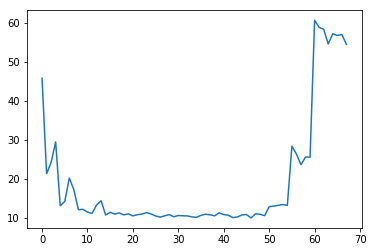

In [13]:
from matplotlib import pyplot as plt
plt.plot(range(len(MAPES)),MAPES)
plt.show()

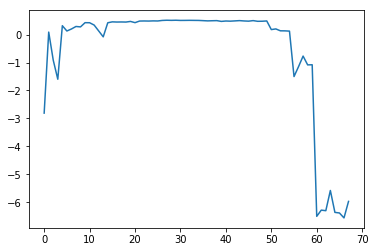

In [12]:
from matplotlib import pyplot as plt
plt.plot(range(len(r2s)),r2s)


-0.5894347329251236

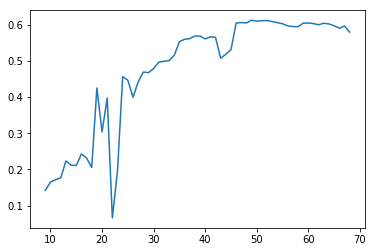

In [21]:
from matplotlib import pyplot as plt
plt.plot(range(9,69),r2s[8:])


In [13]:
max(r2s)

0.5167369239106632

In [17]:
r2s

[-2.3243963800559464,
 -5.122852718987301,
 -1.466225453086044,
 -0.9765732214368865,
 0.04131244740870532,
 -0.05741087802918754,
 -0.21335463841355584,
 -0.044777395479644655,
 0.020514438062677054,
 0.14775545095191123,
 -0.09843726146392595,
 0.0903747652054614,
 0.28604008081344,
 0.20765217756066245,
 0.2723283514588516,
 0.22319049829180637,
 0.2451910419534553,
 0.21236341277763426,
 0.30161277569223943,
 0.3465129756070603,
 0.35254771477960267,
 0.27478340419172265,
 0.2625933693915301,
 0.3497972083635482,
 0.3397104819858573,
 0.3469183890249389,
 0.36170864252864066,
 0.3260883969942254,
 0.40574149757735134,
 0.3272323686015437,
 -0.1736892263550447,
 -0.39244511728335274,
 0.06570195164843029,
 0.2441273048369964,
 0.25790235342469836,
 0.24597415275739953,
 0.2509308891626172,
 0.34613515806401063,
 0.3695159604058712,
 0.38139908855394056,
 0.3796616107914146,
 0.36876404375336835,
 0.36139120455344076,
 0.37522733502024297,
 0.38243218382087707,
 0.40324094695441537,


In [15]:
max(r2s)

0.47391227923156953

In [ ]:
import pickle
with open('/data/chainedneuralmodels.bin','wb') as handle:
    d= {'models':models,\
       'x-scalers':scalers,\
        'y-scalers':y_scalers}
    pickle.dump(d,handle,protocol=pickle.HIGHEST_PROTOCOL)

In [14]:
len(models)

69

A reason not to use these is that these sixty models and scalers pickle to about 6 megabytes. We would need roughly 500-600 megabytes of models in memory then, just to run our time table predictions quickly. Though it is possible we could just load and delete them as needed, the linear models are miniscule in comparison.

They also take much longer to predict than the linear models, (but only slightly), and some still give negative predictions.

Also, an instance can be seen of r2 score sharply plunging at the end of the route. Though I think this is also true for the linear models. The trouble is that, since the training time is so greatly increased, it will be harder to avoid this. Harder than with the liner models anyway.

The r2 scores are significantly better, but the MAPE isn't. The r2 matters to us as data scientists, but it would seem like a) MAPE and b) actually having a working app would be of more concern to the user.






In [25]:
sum(MAPES)/len(MAPES)

12.103629580532802

The Mean MAPE was about 13% for the linear models. They're also much faster.